In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Basic EDA

In [7]:
data_frame = pd.read_csv("./CASE1201.ASC.txt", delimiter= " ", skipinitialspace= True)
data_frame.head()

,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   50 non-null     object 
 1   sat     50 non-null     int64  
 2   takers  50 non-null     int64  
 3   income  50 non-null     int64  
 4   years   50 non-null     float64
 5   public  50 non-null     float64
 6   expend  50 non-null     float64
 7   rank    50 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.3+ KB


In [9]:
data_frame.describe()

,sat,takers,income,years,public,expend,rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,947.940000,26.220000,293.980000,16.209200,81.204000,22.965600,79.988000
std,70.856397,22.022521,43.693034,0.699982,9.830917,6.144932,6.523072
min,790.000000,2.000000,208.000000,14.390000,44.800000,13.840000,69.800000
25%,889.250000,6.250000,261.500000,15.910000,76.925000,19.592500,74.025000
50%,966.000000,16.000000,295.000000,16.360000,80.800000,21.610000,80.850000
75%,998.500000,47.750000,325.000000,16.757500,88.250000,26.387500,85.825000
max,1088.000000,69.000000,401.000000,17.410000,97.000000,50.100000,90.600000


### Display the correlation and covariance tables for the raw features.

In [10]:
#Correlation matrix
correlation_matrix = data_frame.corr(method= "pearson", numeric_only= True)
correlation_matrix

,sat,takers,income,years,public,expend,rank
sat,1.000000,-0.857810,0.584467,0.330969,-0.080357,-0.062878,0.879909
takers,-0.857810,1.000000,-0.661935,-0.101544,0.123556,0.283630,-0.942833
income,0.584467,-0.661935,1.000000,0.134762,-0.306567,0.131519,0.532700
years,0.330969,-0.101544,0.134762,1.000000,-0.417118,0.059829,0.070224
public,-0.080357,0.123556,-0.306567,-0.417118,1.000000,0.284591,0.050624
expend,-0.062878,0.283630,0.131519,0.059829,0.284591,1.000000,-0.264969
rank,0.879909,-0.942833,0.532700,0.070224,0.050624,-0.264969,1.000000


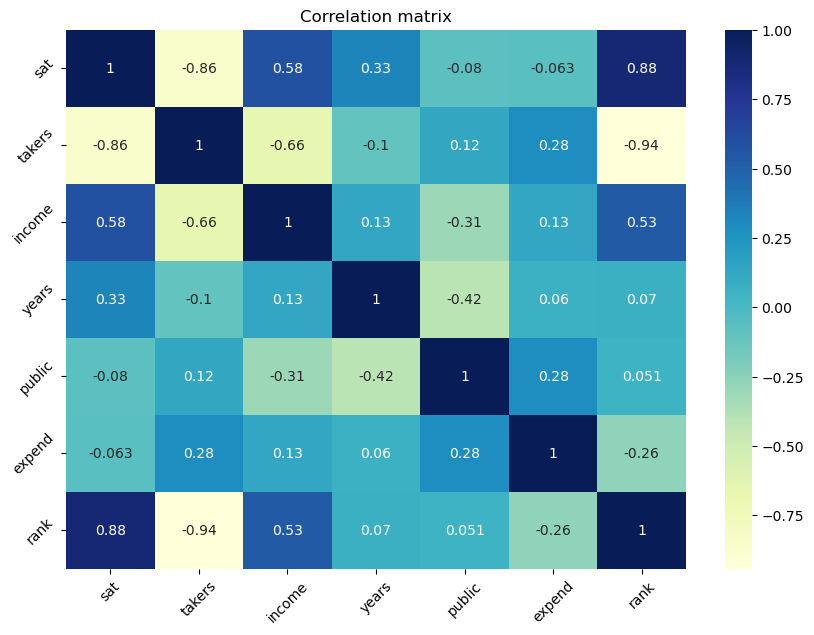

In [11]:
plt.figure(figsize=(10, 7))
sns.heatmap(data= correlation_matrix, annot= True, cmap= "YlGnBu")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation matrix")
plt.show()

In [12]:
covariance_matrix = data_frame.cov(numeric_only= True)
covariance_matrix

,sat,takers,income,years,public,expend,rank
sat,5020.628980,-1338.557959,1809.468163,16.415461,-55.975265,-27.377412,406.695184
takers,-1338.557959,484.991429,-636.934286,-1.565331,26.750122,38.382824,-135.442204
income,1809.468163,-636.934286,1909.081224,4.121616,-131.683592,35.311747,151.826286
years,16.415461,-1.565331,4.121616,0.489975,-2.870384,0.257343,0.320643
public,-55.975265,26.750122,-131.683592,-2.870384,96.646922,17.192242,3.246376
expend,-27.377412,38.382824,35.311747,0.257343,17.192242,37.760192,-10.620972
rank,406.695184,-135.442204,151.826286,0.320643,3.246376,-10.620972,42.550465


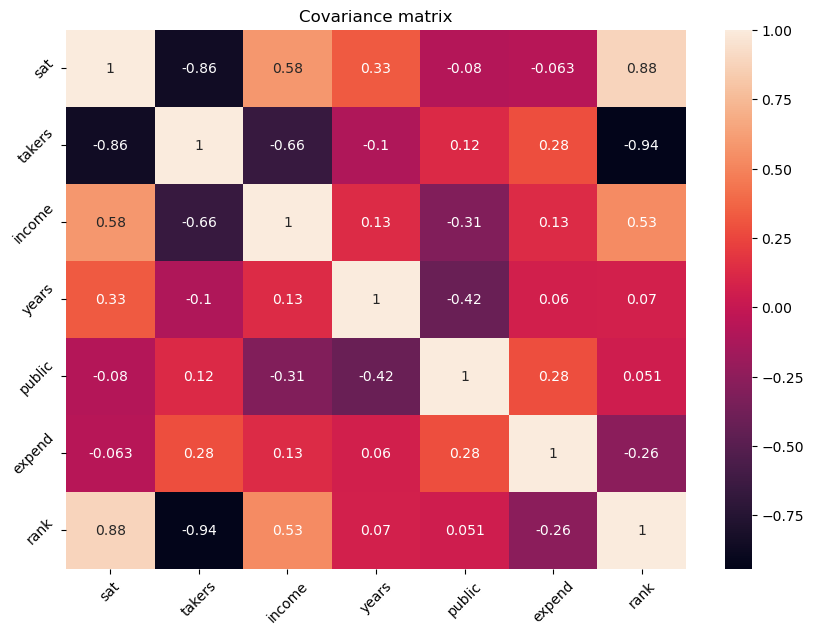

In [13]:
plt.figure(figsize=(10, 7))
sns.heatmap(data= correlation_matrix, annot= True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Covariance matrix")
plt.show()

### Build a: (a) simple (intercept + takers) and (b) full linear regression model to predict the SAT scores.

In [14]:
#Univariate Linear regression using intercept and taker only
X_train_univariate= data_frame["takers"]
y_train = data_frame["sat"]

#Adding constant. It represents intercept. 
X_train_univariate_with_const = sm.add_constant(X_train_univariate)
print(X_train_univariate_with_const.head())

#Simple univariate linear regression model
simple_ols_model = sm.OLS(y_train, X_train_univariate_with_const).fit()

simple_ols_model.summary()

   const  takers
0    1.0       3
1    1.0       2
2    1.0       3
3    1.0       5
4    1.0       5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.77e-15
Time:                        00:06:59   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1020.3062      8.139    125.359      0.000    1003.941    1036.671
takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Full Linear regression using intercept and taker only
X_train_multivariate= data_frame.drop(columns= ["state", "sat"])
# y_train = data_frame["sat"]

#Adding constant. It represents intercept. 
X_train_multivariate_with_const = sm.add_constant(X_train_multivariate)
print(X_train_multivariate_with_const.head())

#Full univariate linear regression model
full_ols_model = sm.OLS(y_train, X_train_multivariate_with_const).fit()

full_ols_model.summary()

   const  takers  income  years  public  expend  rank
0    1.0       3     326  16.79    87.8   25.60  89.7
1    1.0       2     264  16.07    86.2   19.95  90.6
2    1.0       3     317  16.57    88.3   20.62  89.8
3    1.0       5     338  16.30    83.9   27.14  86.3
4    1.0       5     293  17.25    83.6   21.05  88.5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.16e-18
Time:                        00:06:59   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.6591    211.510     -0.448      0.657    -521.209     331.891
takers        -0.4801      0.694     -0.692      0.493      -1.879       0.919
income        -0.0082      0.152     -0.054      0.957      -0.315       0.299
years         22.6101      6.315      3.581      0.001       9.876      35.345
public        -0.4642      0.579     -0.802      0.427      -1.632       0.704
expend         2.2120      0.846      2.615      0.012       0.506       3.918
rank           8.4762      2.108      4.021      0.000       4.225      12.727
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.957
Skew:                          -0.591   Prob(JB):                        0.228
Kurtosis:                       3.152   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Choose at least one method from each of the three feature selection techniques (filter, wrapper, and embedded). Select and report the “best” features using these three methods.

In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

#### Filter Technique (Mutual Information Gain)
- Mutual information measures the dependency between each feature and the target variable.
- High mutual information suggests a strong relationship between a feature and the target.

In [17]:
selector= SelectKBest(score_func= mutual_info_regression, k=4).fit(X= X_train_multivariate, y= y_train)
# print(selector.get_support())
selected_features = X_train_multivariate.columns[selector.get_support()]
print(f"Best 4 predictors:: {selected_features.to_list()}")

Best 4 predictors:: ['takers', 'income', 'public', 'rank']


In [18]:
#Filter method (Mutual Information Gain)
mutual_info = mutual_info_regression(X_train_multivariate, y_train, random_state= 42)

df = pd.DataFrame(data= {
    "Predictor Name": X_train_multivariate.columns,
    "Dependency Value": mutual_info})
df.sort_values(by= "Dependency Value", ascending= False).reset_index().drop("index", axis= 1)

,Predictor Name,Dependency Value
0,rank,0.763744
1,takers,0.683812
2,income,0.304914
3,public,0.111706
4,years,0.059230
5,expend,0.031271


By using **mutual information gain**, Features having strong association with the target variable from strongest to weakest order: 
- rank
- takers
- income
- public
- years
- expend

If we select best 4 pridectors then, rank, takers, income and public would be my choices using mutual information gain. SelectKBest method also showed same result. 

#### Wrapper Method (Exhaustive Feature Elimination)

In [19]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression


In [23]:
model = LinearRegression()

exhaustive_feature_selector = EFS(model,
          min_features=1,
          max_features=6,  # Adjust this to limit the feature subset size
          scoring='neg_mean_squared_error',  # Use an appropriate metric
          cv=5)

exhaustive_feature_selector.fit(X_train_multivariate, y_train)

best_features = list(exhaustive_feature_selector.best_feature_names_)
print("Best feature subset:", best_features)



Features: 63/63

Best feature subset: ['years', 'expend', 'rank']


While using Exhaustive Feature Elimination method from wrapper technique, **['years', 'expend', 'rank']** seem to have best performance for linear regression model.

#### Embedded methods (Elastic Net)

In [26]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet with a specific mixing parameter (alpha and l1_ratio)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model
elastic_net.fit(X_train_multivariate, y_train)

# Get selected features
selected_features = X_train_multivariate.columns[(elastic_net.coef_ != 0)]
print("Selected features:", selected_features)
elastic_net.coef_

Selected features: Index(['takers', 'income', 'years', 'public', 'expend', 'rank'], dtype='object')


array([-0.50278777, -0.02114326, 19.73825868, -0.57997478,  2.32067558,
        8.49635365])